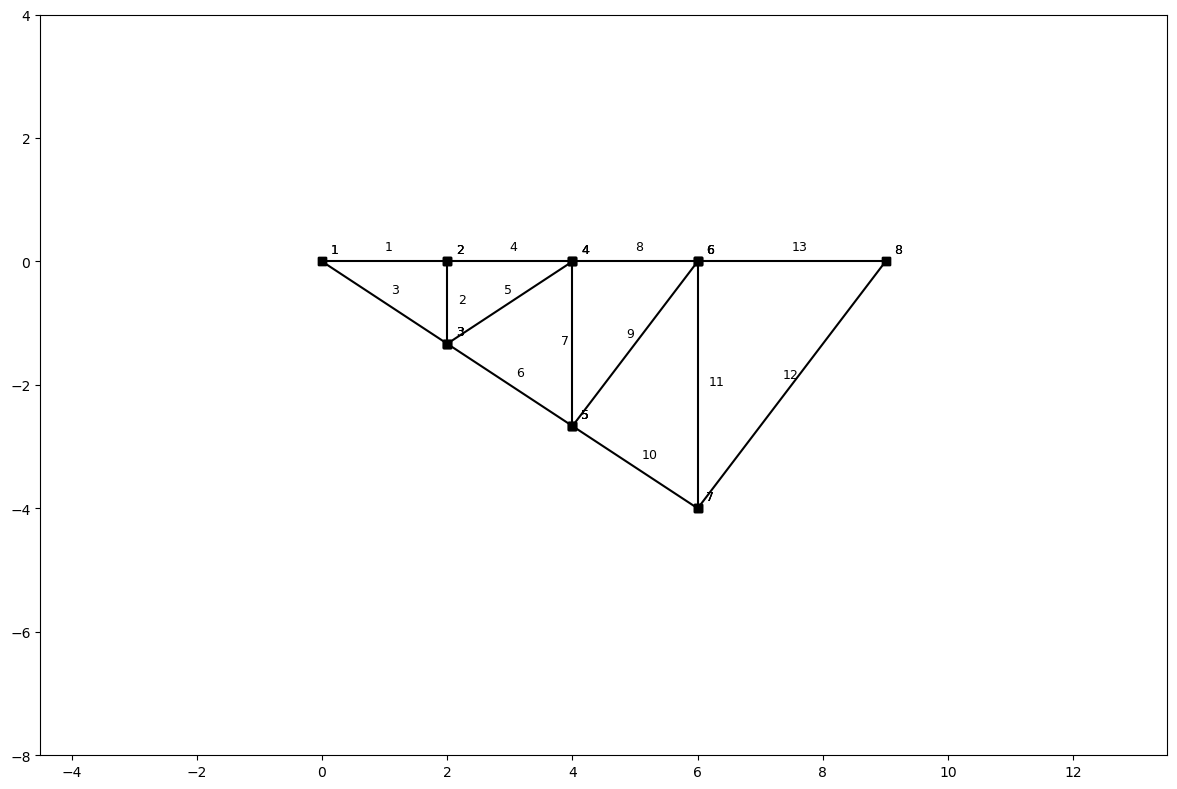

In [1]:
#lets import the systemElemnts from the anastruct library
from anastruct import SystemElements
#instatiate the SystemElement object
ss = SystemElements()

# Tuple of coordinates
A,B,C,D,E,F,G,H = [0,0],[2,0],[2,-4/3],[4,0],[4,-8/3],[6,0],[6,-4],[9,0]
#lets add truss members at node using add_truss_element method and passing coordinate loaction as argument to 
#define length of each member
ss.add_truss_element(location=[A, B])
ss.add_truss_element(location=[B, C])
ss.add_truss_element(location=[A, C]) 
ss.add_truss_element(location=[B, D])
ss.add_truss_element(location=[C, D])
ss.add_truss_element(location=[C, E])
ss.add_truss_element(location=[E, D])
ss.add_truss_element(location=[D, F])
ss.add_truss_element(location=[E, F])


ss.add_truss_element(location=[E, G])
ss.add_truss_element(location=[F, G])
ss.add_truss_element(location=[G, H])
ss.add_truss_element(location=[H, F])
#this method plot our assemble structure
ss.show_structure()

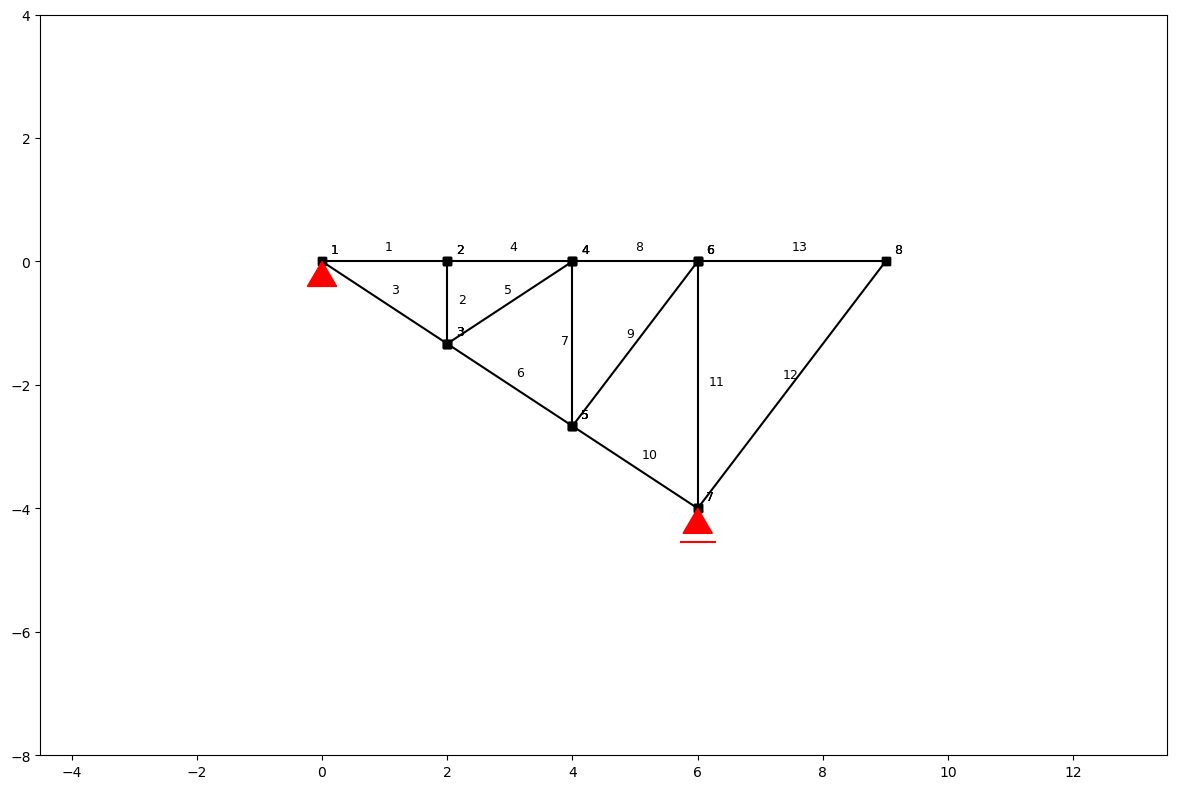

In [2]:
# Add support condition

ss.add_support_hinged(node_id = 1) 

ss.add_support_roll(node_id = 7)

ss.show_structure()

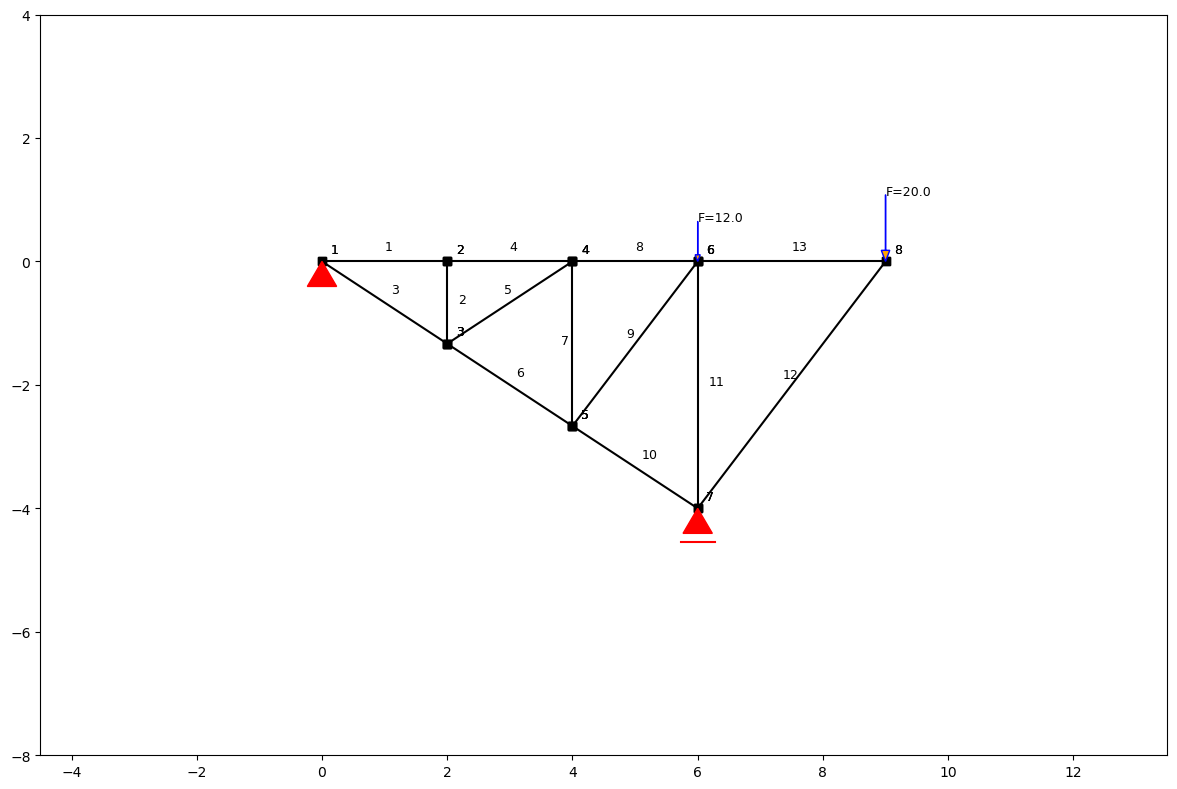

In [3]:
# Add loadings
ss.point_load(Fy=-12, node_id=6)
ss.point_load(Fy=-20, node_id=8)
ss.show_structure()

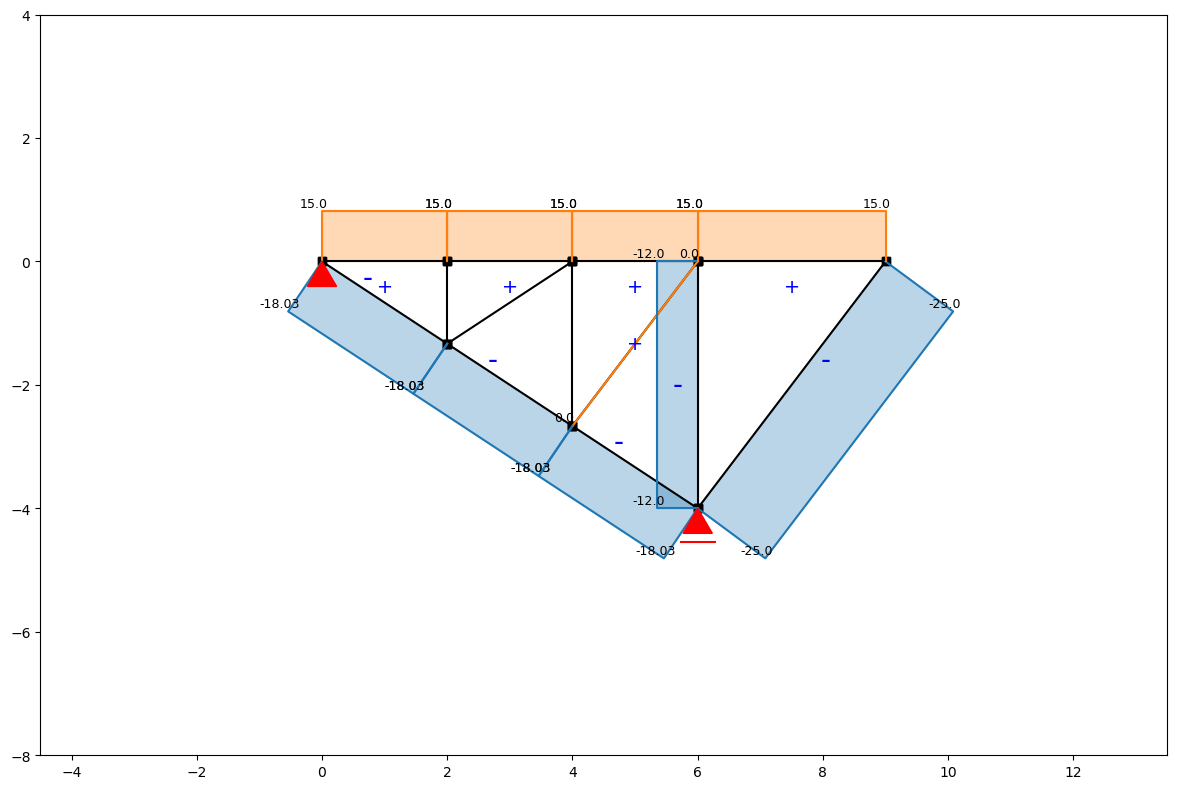

In [4]:
#this method compute all the reaction forces and axial forces in the model
ss.solve()
#this method plot the computed axial forces of the truss elements or members  
ss.show_axial_force()

In [5]:
import pandas as pd
df = pd.DataFrame(ss.get_element_results())

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df  = df[['id', 'length','Nmax']]
df.to_excel('result-4.xlsx')